# Dataset tugas berkelompok : spotify top 50 song 2021
* Nama : Gede Wahyu Purnama
* NIM : 2015101014
* Kelas : Ilkom A semester 4
## Dataset description
- Popularity - The higher the value the more popular the song is
- Danceability - The higher the value, the easier it is to dance to this song
- Energy - The energy of a song - the higher the value, the more energtic. song
- Key - the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1 (range: -1; 11)
- Loudness (dB) - The higher the value, the louder the song
- Mode - indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- Speechiness - The higher the value the more spoken word the song contains
- Acousticness - The higher the value the more acoustic the song is
- Instrumentalness - the number of vocals in a song. The closer the value to 1.0, the more instrumental the song is
- Liveness - The higher the value, the more likely the song is a live recording
- Valence - The higher the value, the more positive mood for the song
- Tempo - the overall estimated tempo of a track in beats per minute (BPM)
- Duration - duration of the song in ms
- Time signature - an estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
df = pd.read_csv("spotify_top50_2021.csv")

In [2]:
# cek data kosong
df.isnull().sum()

id                  0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [3]:
# mengubah durasi dari milidetik ke menit
df.duration_ms = df.duration_ms.div(60000).round(2)
df = df.rename(columns={'duration_ms':'duration'})
df.head()

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,4.03,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,2.30,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,2.36,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,2.97,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,3.38,4


In [4]:
#drop kolom yang tidak diperlukan
df.drop(['id','track_id'],axis=1,inplace=True)

### Visualisasi

Relasi antara popularitas dengan parameter-parameter lagu

In [5]:
parameter = set(df.columns) - {'id','artist_name','track_id','track_name','popularity'}

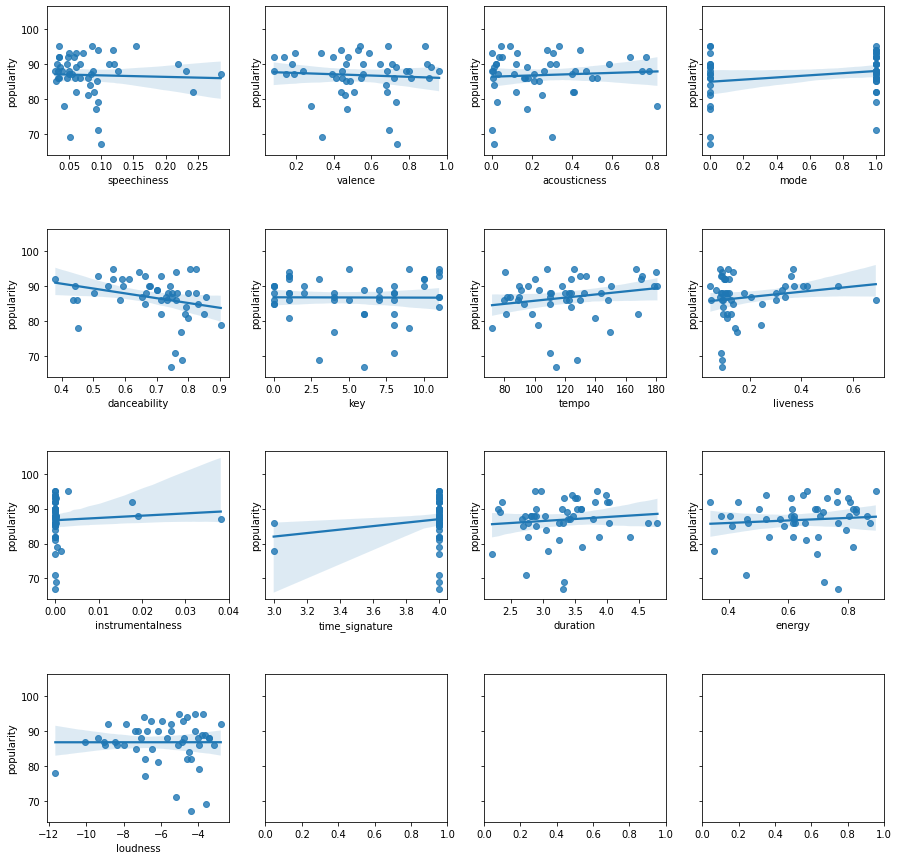

In [6]:
fig, ax = plt.subplots(4,4,sharey=True,figsize=(15,15))
i = j = 0
for p in parameter:
    if j == 4:
        j = 0
        i +=1
    sns.regplot(data=df,ax=ax[i][j],x=p,y='popularity')
    j += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

Jumlah lagu populer yang dimiliki setiap artis

In [7]:
df['JumlahLagu']=1
df_popular_artist=df.groupby('artist_name')['JumlahLagu'].sum().reset_index().sort_values(by='JumlahLagu',ascending=False)
df_popular_artist.head()

,artist_name,JumlahLagu
5,Doja Cat,4
24,Olivia Rodrigo,4
3,Bad Bunny,3
19,Lil Nas X,2
2,BTS,2


<AxesSubplot:title={'center':'Top 10 artist terpopuler di spotify 2021'}, xlabel='JumlahLagu', ylabel='artist_name'>

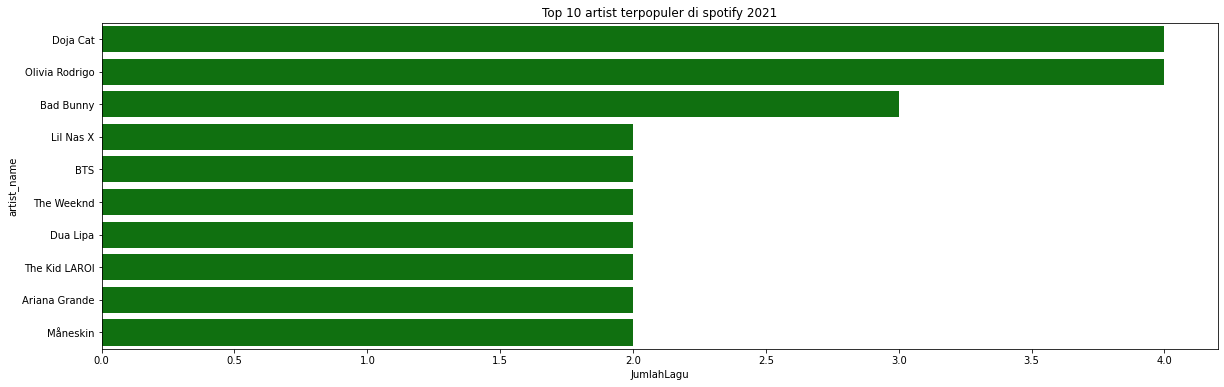

In [8]:
plt.figure(figsize=(20,6))
plt.title("Top 10 artist terpopuler di spotify 2021")
sns.barplot(x="JumlahLagu", y="artist_name", color="Green", data=df_popular_artist.head(10))